# 02_ Learn with handling Missing Data | using titanic_toy data

# Mean vs Median Imputation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df= pd.read_csv('/kaggle/input/titanic-toy/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
X= df.drop(columns= ['Survived'])
y= df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
median_age= X_train['Age'].median()
mean_age= X_train['Age'].mean()

median_fare= X_train['Fare'].median()
mean_fare= X_train['Fare'].mean()

In [13]:
X_train['median_age']= X_train['Age'].fillna(median_age)
X_train['mean_age']= X_train['Age'].fillna(mean_age)

X_train['median_fare']= X_train['Fare'].fillna(median_fare)
X_train['mean_fare']= X_train['Fare'].fillna(mean_fare)

In [14]:
X_train.sample(5)

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
497,NaN,15.1000,0,28.75,29.785904,15.1000,15.1000
456,65.0,26.5500,0,65.00,65.000000,26.5500,26.5500
75,25.0,7.6500,0,25.00,25.000000,7.6500,7.6500
833,23.0,7.8542,0,23.00,23.000000,7.8542,7.8542
650,NaN,7.8958,0,28.75,29.785904,7.8958,7.8958


In [15]:
X_train.describe()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
count,564.000000,676.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.785904,32.617597,0.932584,29.570576,29.785904,31.699430,32.617597
std,14.295087,49.479268,1.653860,12.727512,12.720559,48.374487,48.210357
min,0.420000,0.000000,0.000000,0.420000,0.420000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,23.000000,23.000000,7.925000,7.925000
50%,28.750000,14.458300,0.000000,28.750000,29.785904,14.458300,15.500000
75%,38.250000,31.275000,1.000000,35.000000,35.000000,30.500000,32.617597
max,71.000000,512.329200,10.000000,71.000000,71.000000,512.329200,512.329200


In [16]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['median_age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


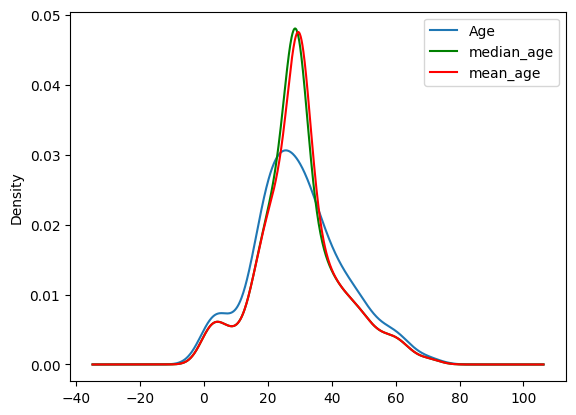

In [17]:
fig= plt.figure()
ax= fig.add_subplot(111)

#orriginal age data
X_train['Age'].plot(kind= 'kde', ax=ax)

## variable imputed with the median
X_train['median_age'].plot(kind= 'kde', ax=ax, color= 'green')

## variable imputed with the mean
X_train['mean_age'].plot(kind= 'kde', ax=ax, color= 'red')

#add legend

line, labels= ax.get_legend_handles_labels()
ax.legend(line, labels, loc= 'best')


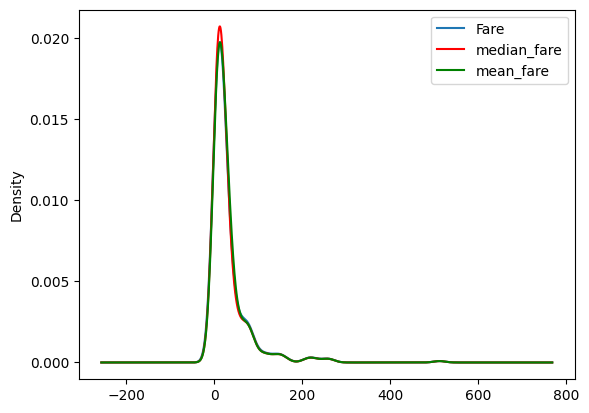

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
X_train.cov()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
median_age,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
mean_age,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
median_fare,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
mean_fare,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [20]:
X_train.corr()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
median_age,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
mean_age,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
median_fare,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
mean_fare,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

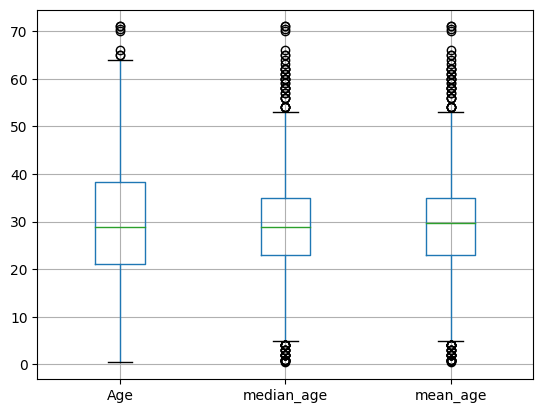

In [21]:
X_train[['Age', 'median_age', 'mean_age']].boxplot()

<Axes: >

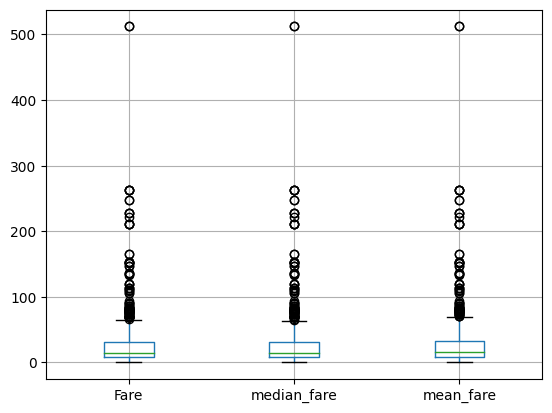

In [22]:
X_train[['Fare', 'median_fare', 'mean_fare']].boxplot()

In [23]:
imputer1 = SimpleImputer(strategy= 'median')
imputer2 = SimpleImputer(strategy= 'mean')

In [24]:
CT= ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder= 'passthrough')

In [25]:
CT.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
CT.named_transformers_['imputer1'].statistics_

array([28.75])

In [27]:
CT.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [28]:
X_train_transformed= CT.fit_transform(X_train)
X_test_transformed= CT.fit_transform(X_test)

In [29]:
X_train_transformed

array([[ 40.        ,  27.7208    ,   0.        , ...,  40.        ,
         27.7208    ,  27.7208    ],
       [  4.        ,  16.7       ,   2.        , ...,   4.        ,
         16.7       ,  16.7       ],
       [ 47.        ,   9.        ,   0.        , ...,  47.        ,
          9.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        , ...,  71.        ,
         49.5042    ,  49.5042    ],
       [ 28.75      , 221.7792    ,   0.        , ...,  29.78590426,
        221.7792    , 221.7792    ],
       [ 28.75      ,  25.925     ,   0.        , ...,  29.78590426,
         25.925     ,  25.925     ]])